Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Simple linear regression: Problem solving

For this session, we will use a new dataset, `trees`, that contains the following data for 31 cherry trees:

| Variable | Type  | Description                                           |
|----------|-------|:-------------------------------------------------------|
| Girth    | Ratio | Tree diameter (rather than girth, actually) in inches |
| Height   | Ratio | Height in ft                                          |
| Volume   | Ratio | Volume of timber in cubic ft                          |

Our main question is whether `Height` can be used to predict `Volume`.

## Load the data

Start by importing `pandas`.

In [23]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="importAs" id="ji{aK+A5l`eBa?Q1/|Pf" x="128" y="319"><field name="libraryName">pandas</field><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field></block></xml>

And load the dataframe, displaying it to make sure it looks right.

In [24]:
dataframe = pd.read_csv('datasets/trees.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="variables_set" id="9aUm-oG6/!Z54ivA^qkm" x="-7" y="70"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="g.yE$oK%3]$!k91|6U|I"><mutation items="1"></mutation><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="fBBU[Z}QCipaz#y=F$!p"><field name="TEXT">datasets/trees.csv</field></block></value></block></value></block><block type="variables_get" id="!eP6XIK/tn}Rg#ZEz[Qw" x="0" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


## Describe and visualize

Print out the descriptive statistics.

In [25]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="?LJ($9e@x-B.Y,`==|to" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


----------------------
**QUESTION:**

What is the measure of variability in the descriptive statistics?

**ANSWER: (click here to edit)**

*`std` which is standard deviation*

<hr>

**QUESTION:**

On this measure of variability, how are `Height` and `Volume` different?
Do you expect this to affect our model, since it is using `Height` to predict `Volume`?

**ANSWER: (click here to edit)**

*`Volume` has more variability than `Height`. This is not necessarily a big problem though it suggests that predictions based on `Height` will have larger residuals than might occur if `Height` and `Volume` were more evenly matched. We should be on the lookout for other possible problems with variance though.*

<hr>

Plot the relationship between `Height` and `Volume`.

First import `plotly.express`.

In [26]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable></variables><block type="importAs" id="kPF|afHe60B:rsCmJI2O" x="128" y="178"><field name="libraryName">plotly.express</field><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field></block></xml>

And create a scatterplot.

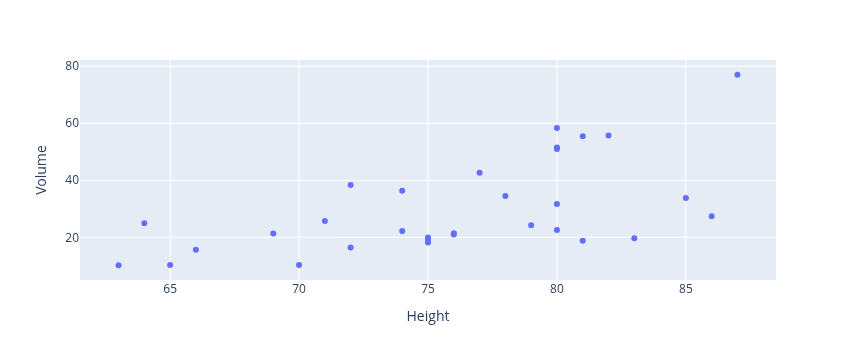

In [27]:
px.scatter(dataframe,x="Height",y="Volume")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="Height"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="Volume"</field></block></value></block></xml>

----------------------

**QUESTION:**

Imagine you had to draw a line through these points. 
Look at where it would go on the left side of the graph, then look at where it would go on the right side.
Are you as confident about one side as the other? 
Why or why not?

**ANSWER: (click here to edit)**

*Because the points spread out on the right hand side but are fairly tightly clustered on the left, I'm more confident about the left hand side than the right hand side.*

<hr>

## Model

Next create a simple linear regression model.

Start by importing `sklearn.linear_model` and `numpy`.

In [28]:
import sklearn.linear_model as linear_model
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable><variable id="YynR+H75hTgW`vKfMxOx">np</variable></variables><block type="importAs" id="m;0Uju49an!8G3YKn4cP" x="93" y="288"><field name="libraryName">sklearn.linear_model</field><field name="VAR" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><next><block type="importAs" id="^iL#`T{6G3.Uxfj*r`Cv"><field name="libraryName">numpy</field><field name="VAR" id="YynR+H75hTgW`vKfMxOx">np</field></block></next></block></xml>

Create the model.

In [36]:
lm = linear_model.LinearRegression()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable></variables><block type="variables_set" id="!H`J#y,K:4I.h#,HPeK{" x="127" y="346"><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><value name="VALUE"><block type="varCreateObject" id="h:O3ZfE(*c[Hz3sF=$Mm"><mutation items="1"></mutation><field name="VAR" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><field name="MEMBER">LinearRegression</field><data>linear_model:LinearRegression</data></block></value></block></xml>

Train the model.

In [38]:
lm.fit(dataframe[['Height']],dataframe[['Volume']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">fit</field><data>lm:fit</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">Height</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">Volume</field></block></value></block></value></block></value></block></xml>

LinearRegression()

Print out the slope and intercept.

In [40]:
print('Slope:' + str(lm.coef_))
print('Intercept:' + str(lm.intercept_))

#<xml xmlns="https://developers.google.com/blockly/xml"><block type="text_print" id="j5BcP79^W9MrIANYKq?;" x="87" y="310"><value name="TEXT"><shadow type="text" id="uE944Hp*.F|Wb5#+L31v"><field name="TEXT">abc</field></shadow><block type="text_join" id="-vbo:9YP7lVmJHdkoJ;a"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="1!%1FXb+4l@Izm;6-F-t"><field name="TEXT">Slope:</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="%=Ms*x[zw4.$_uj=npX-"><field name="CODE">lm.coef_</field></block></value></block></value><next><block type="text_print" id="A9a/[%9)zMvV1gm[Y?b3"><value name="TEXT"><shadow type="text" id="FMjy^A}Frt{7@{p{7=7M"><field name="TEXT">abc</field></shadow><block type="text_join" id="m=N7rr`^v60]6As=]Dsh"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="c!GHM@*a;$sr9PVQmRCB"><field name="TEXT">Intercept:</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="F8%zz-(:xU}d[4s]Mt/W"><field name="CODE">lm.intercept_</field></block></value></block></value></block></next></block></xml>

Slope:[[1.54334975]]
Intercept:[-87.12361354]


### Model predictions

Use the regression model to predict `Volume` using the minimum `Height` and the maximum `Height`.

In [42]:
print('Min prediction:' + str(lm.predict([[49.25]])))
print('Max prediction:' + str(lm.predict([[80.5]])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable></variables><block type="text_print" id="j5BcP79^W9MrIANYKq?;" x="68" y="110"><value name="TEXT"><block type="text_join" id="-vbo:9YP7lVmJHdkoJ;a"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="1!%1FXb+4l@Izm;6-F-t"><field name="TEXT">Min prediction:</field></block></value><value name="ADD1"><block type="varDoMethod" id="}kYB})gMr4v^QoYM1W`+"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="lists_create_with" id="?;opBn(@h}!8HxFpLKg}"><mutation items="1"></mutation><value name="ADD0"><block type="lists_create_with" id="P7xbP`J]OPSE`B:*c?/V"><mutation items="1"></mutation><value name="ADD0"><block type="math_number" id="caV|uxY=voCPu-V614gs"><field name="NUM">49.25</field></block></value></block></value></block></value></block></value></block></value><next><block type="text_print" id="SV+rE/Xeq$q79OZ?1Q{6"><value name="TEXT"><block type="text_join" id="m)=yHW9/h%(0(}3;7;c%"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="_!i@0I=8wb-+|o4vB2wm"><field name="TEXT">Max prediction:</field></block></value><value name="ADD1"><block type="varDoMethod" id="+;Hg22#OrMYn{hH%0Gap"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="lists_create_with" id="uAR]{5kn%).|-aCdX,cQ"><mutation items="1"></mutation><value name="ADD0"><block type="lists_create_with" id="Cn(z!`sUQM~?1/*I.ZH)"><mutation items="1"></mutation><value name="ADD0"><block type="math_number" id="UGp:I*?tTuqvi=7dpHeX"><field name="NUM">80.5</field></block></value></block></value></block></value></block></value></block></value></block></next></block></xml>

Min prediction:[[-11.11363817]]
Max prediction:[[37.11604163]]


/opt/tljh/user/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/tljh/user/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



----------------------

**QUESTION:**

How similar is your min for `Volume` to the min in the descriptive statistics?
How similar is your max for `Volume` to the max in the descriptive statistics?
What could be the reason for the difference?

**ANSWER: (click here to edit)**

*The min is very close to the observed min, but the max is pretty different. This is probably because there is so much spread on the right (the higher values of `Height`) that we can't fit a good line to it.*

<hr>

Make a new dataframe with a column of predictions.

In [44]:
pDataframe = dataframe.assign(predictions= (lm.predict(dataframe[['Height']])))

pDataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="CudVpfu+F^ruj_:ZU_(,">pDataframe</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="-6" y="95"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><value name="VALUE"><block type="varDoMethod" id="ou+aFod:USt{s9i+emN}"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="UFqs+Ox{QF6j*LkUvNvu"><field name="CODE">predictions=</field><value name="INPUT"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="Asy|RX,d{QfgBQmjI{@@"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">Height</field></block></value></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="@)|kiH+Wk0u4_t3R6_?[" x="0" y="500"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field></block></xml>

,Girth,Height,Volume,predictions
0,8.3,70,10.3,20.910869
1,8.6,65,10.3,13.194120
2,8.8,63,10.2,10.107421
3,10.5,72,16.4,23.997569
4,10.7,81,18.8,37.887717
5,10.8,83,19.7,40.974416
6,11.0,66,15.6,14.737470
7,11.0,75,18.2,28.627618
8,11.1,80,22.6,36.344367
9,11.2,75,19.9,28.627618


Create a new figure with the predictions.

First import `plotly.graph_objects`.

In [46]:
import plotly.graph_objects as go

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="T8P]o]%(ow(J_#fHlWGz">go</variable></variables><block type="importAs" id="sy2s[p*Kv8=jkjY4+sd2" x="-131" y="165"><field name="libraryName">plotly.graph_objects</field><field name="VAR" id="T8P]o]%(ow(J_#fHlWGz">go</field></block></xml>

Create the empty figure.

In [48]:
fig = go.Figure()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w|!1_/S4wRKF4S1`6Xg+">fig</variable><variable id="T8P]o]%(ow(J_#fHlWGz">go</variable></variables><block type="variables_set" id="yPn1Ft4kyo=p:TD!uzug" x="-150" y="170"><field name="VAR" id="w|!1_/S4wRKF4S1`6Xg+">fig</field><value name="VALUE"><block type="varCreateObject" id="w:3][K!nW=351!)x!@:Q"><mutation items="1"></mutation><field name="VAR" id="T8P]o]%(ow(J_#fHlWGz">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value></block></xml>

Add a scatterplot of observed data to the figure.

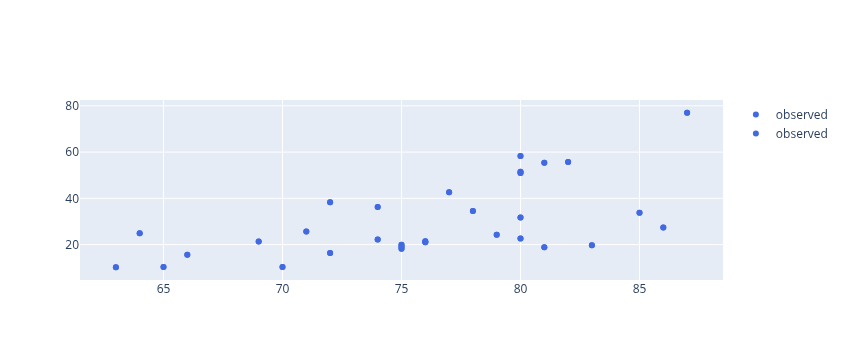

In [50]:
fig.add_scatter(x= (np.ravel(dataframe[['Height']])),y= (np.ravel(dataframe[['Volume']])),mode="markers",name="observed",line=dict(color='royalblue'))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w|!1_/S4wRKF4S1`6Xg+">fig</variable><variable id="YynR+H75hTgW`vKfMxOx">np</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="-31" y="143"><mutation items="5"></mutation><field name="VAR" id="w|!1_/S4wRKF4S1`6Xg+">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="ADD0"><block type="valueOutputCodeBlock" id="?9~fa0|VKDIpx+X]Ne],"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod" id="PqgNL`IVR~dg0v3Zc@6E"><mutation items="1"></mutation><field name="VAR" id="YynR+H75hTgW`vKfMxOx">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="indexer" id="{0YKup]NzKguA|u$}T+$"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="t9a]MmJQplr$V%vOxUz3"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="jydyI4?hT45#whKP08UT"><field name="TEXT">Height</field></block></value></block></value></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="*_^=o_W]Sgn}Tc^ke{#)"><field name="CODE">y=</field><value name="INPUT"><block type="varDoMethod" id="3?uC$.@1v/6AYM0^KD^t"><mutation items="1"></mutation><field name="VAR" id="YynR+H75hTgW`vKfMxOx">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="indexer" id="LY/hxSnBOfWTui}8@d.*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="WIy]!H9t$(6VN9#y1C,-"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="5W]!]7j$xQzCaP0K/$Hq"><field name="TEXT">Volume</field></block></value></block></value></block></value></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="sif/rSeATJ5@wW{~i{bj"><field name="CODE">mode="markers"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="tT4JzYg!8$,J4BX,5*(n"><field name="CODE">name="observed"</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="OxNE0Iz6@tG*|Lng7anA"><field name="CODE">line=dict(color='royalblue')</field></block></value></block></xml>

Add a scatterplot of *predicted* data to the figure.

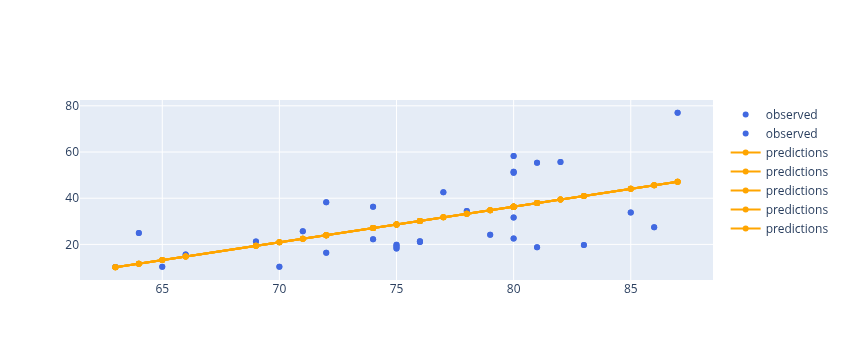

In [55]:
fig.add_scatter(x= (np.ravel(pDataframe[['Height']])),y= (np.ravel(pDataframe[['predictions']])),mode="lines+markers",name="predictions",line=dict(color='orange'))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w|!1_/S4wRKF4S1`6Xg+">fig</variable><variable id="YynR+H75hTgW`vKfMxOx">np</variable><variable id="CudVpfu+F^ruj_:ZU_(,">pDataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="-31" y="143"><mutation items="5"></mutation><field name="VAR" id="w|!1_/S4wRKF4S1`6Xg+">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="ADD0"><block type="valueOutputCodeBlock" id="?9~fa0|VKDIpx+X]Ne],"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod" id="PqgNL`IVR~dg0v3Zc@6E"><mutation items="1"></mutation><field name="VAR" id="YynR+H75hTgW`vKfMxOx">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="indexer" id="{0YKup]NzKguA|u$}T+$"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><value name="INDEX"><block type="lists_create_with" id="t9a]MmJQplr$V%vOxUz3"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="jydyI4?hT45#whKP08UT"><field name="TEXT">Height</field></block></value></block></value></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="*_^=o_W]Sgn}Tc^ke{#)"><field name="CODE">y=</field><value name="INPUT"><block type="varDoMethod" id="3?uC$.@1v/6AYM0^KD^t"><mutation items="1"></mutation><field name="VAR" id="YynR+H75hTgW`vKfMxOx">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="indexer" id="LY/hxSnBOfWTui}8@d.*"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><value name="INDEX"><block type="lists_create_with" id="WIy]!H9t$(6VN9#y1C,-"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="5W]!]7j$xQzCaP0K/$Hq"><field name="TEXT">predictions</field></block></value></block></value></block></value></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="sif/rSeATJ5@wW{~i{bj"><field name="CODE">mode="lines+markers"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="tT4JzYg!8$,J4BX,5*(n"><field name="CODE">name="predictions"</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="OxNE0Iz6@tG*|Lng7anA"><field name="CODE">line=dict(color='orange')</field></block></value></block></xml>

----------------------

**QUESTION:**

What do you think the residuals will be towards the right (where `Height` is larger) vs. the left?

**ANSWER: (click here to edit)**

*Residuals will be larger on the right.*

<hr>

**QUESTION:**

If you used markers+lines in your plot, why do you think you saw zigzags?

**ANSWER: (click here to edit)**

*`Height` isn't sorted in the dataframe, so values go up and down. To remove zigzags, the dataframe would need to be sorted on `Height`*

<hr>

## Checking the Model Fit

Add a new residuals column to the dataframe that already has your predictions in it.

In [57]:
pDataframe = pDataframe.assign(residuals= (pDataframe['Volume'] - pDataframe['predictions']))

pDataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="CudVpfu+F^ruj_:ZU_(,">pDataframe</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="-41" y="253"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><value name="VALUE"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><field name="MEMBER">assign</field><data>pDataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="^$QWpb1hPzxWt/?~mZBX"><field name="CODE">residuals=</field><value name="INPUT"><block type="math_arithmetic" id="=szmSC[EoihfyX_5cH6v"><field name="OP">MINUS</field><value name="A"><shadow type="math_number" id="E[2Ss)z+r1pVe~OSDMne"><field name="NUM">1</field></shadow><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><value name="INDEX"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">Volume</field></block></value></block></value><value name="B"><shadow type="math_number" id="Z%,Q(P8VED{wb;Q#^bM4"><field name="NUM">1</field></shadow><block type="indexer" id="b.`x=!iTEC%|-VGV[Hu5"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><value name="INDEX"><block type="text" id="g`tk1*Psq~biS1z%3c`q"><field name="TEXT">predictions</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="E}cq}:}y~Zy(`k[Of+UA" x="8" y="500"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field></block></xml>

,Girth,Height,Volume,predictions,residuals
0,8.3,70,10.3,20.910869,-10.610869
1,8.6,65,10.3,13.194120,-2.894120
2,8.8,63,10.2,10.107421,0.092579
3,10.5,72,16.4,23.997569,-7.597569
4,10.7,81,18.8,37.887717,-19.087717
5,10.8,83,19.7,40.974416,-21.274416
6,11.0,66,15.6,14.737470,0.862530
7,11.0,75,18.2,28.627618,-10.427618
8,11.1,80,22.6,36.344367,-13.744367
9,11.2,75,19.9,28.627618,-8.727618


Plot `Height` vs. `residuals` to see if the residuals are evenly above and below 0.

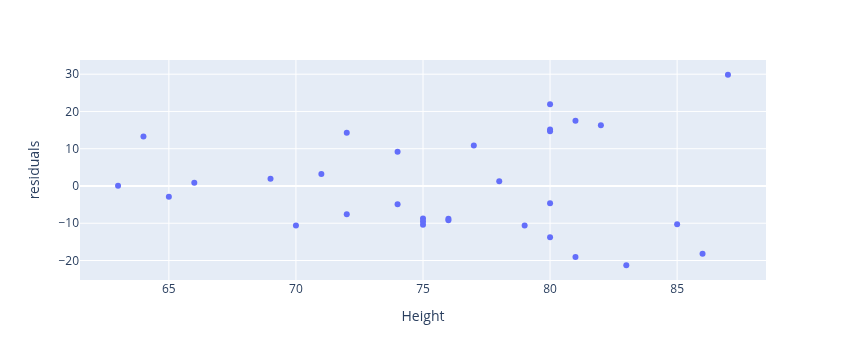

In [59]:
px.scatter(pDataframe,x="Height",y="residuals")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="CudVpfu+F^ruj_:ZU_(,">pDataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="Height"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="residuals"</field></block></value></block></xml>

----------------------

**QUESTION:**

Are the residuals evenly around 0 across values for `Height`?

**ANSWER: (click here to edit)**

*No, residuals are bigger when `Height` is bigger*
<hr>

Check constant variance.

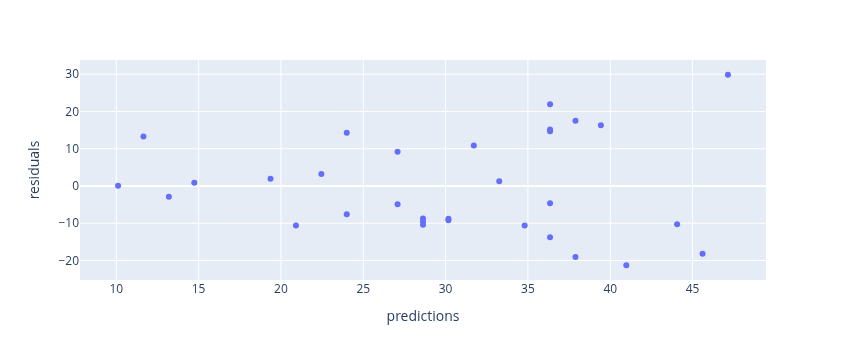

In [61]:
px.scatter(pDataframe,x="predictions",y="residuals")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="CudVpfu+F^ruj_:ZU_(,">pDataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="predictions"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="residuals"</field></block></value></block></xml>

----------------------

**QUESTION:**

Are the residuals evenly around 0 for different values of `predictions`?

**ANSWER: (click here to edit)**

*No, the pattern is identical to the previous scatterplot.*

<hr>

Finally, do a QQ plot to check the normality of the residuals.

Start by importing `scipy.stats`

In [63]:
import scipy.stats as stats

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w9$,qp)n9OuaqvUawNQA">stats</variable></variables><block type="importAs" id="s!DJvUH|7EGf0a5j_M8q" x="-8" y="3"><field name="libraryName">scipy.stats</field><field name="VAR" id="w9$,qp)n9OuaqvUawNQA">stats</field></block></xml>

Transform the data to create `qq`.

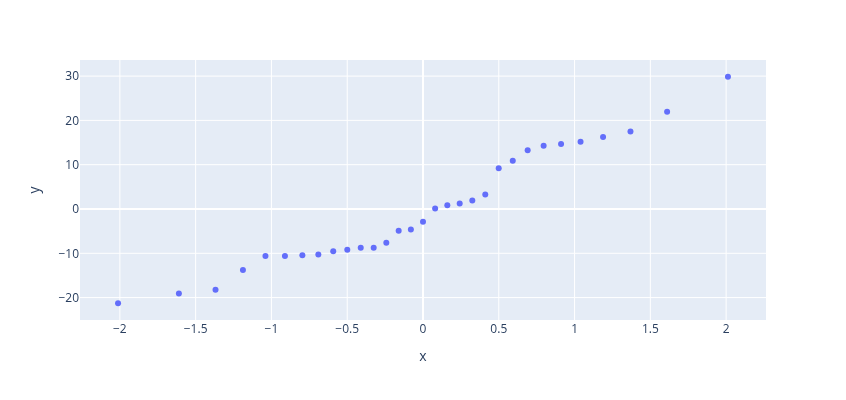

In [65]:
qq = stats.probplot(pDataframe['residuals'],dist="norm")

px.scatter(x=qq[0][0],y=qq[0][1],width=400,height=400)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="$L+9LDClycZtLB0GcP2i">qq</variable><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="w9$,qp)n9OuaqvUawNQA">stats</variable><variable id="CudVpfu+F^ruj_:ZU_(,">pDataframe</variable></variables><block type="variables_set" id="sl)2Q[QQ7ZJ|h(bj{.U/" x="137" y="205"><field name="VAR" id="$L+9LDClycZtLB0GcP2i">qq</field><value name="VALUE"><block type="varDoMethod" id="%^Lye0Nac8rqMLP(,`#D"><mutation items="2"></mutation><field name="VAR" id="w9$,qp)n9OuaqvUawNQA">stats</field><field name="MEMBER">probplot</field><data>stats:probplot</data><value name="ADD0"><block type="indexer" id="0*irIDY)(4T0PQ.+7NW@"><field name="VAR" id="CudVpfu+F^ruj_:ZU_(,">pDataframe</field><value name="INDEX"><block type="text" id="NR*!(xW^tot#CUV|]`^%"><field name="TEXT">residuals</field></block></value></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="b:9v-1TS:Dn)*Frnl^e7"><field name="CODE">dist="norm"</field></block></value></block></value></block><block type="varDoMethod" id="W#mJ)LdV!,XlPD][.K80" x="153" y="367"><mutation items="4"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="Lr1(DqzhIRO3hBC1Iisi"><field name="CODE">x=qq[0][0]</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="S_sSK%7XB%Agj6%?^,q1"><field name="CODE">y=qq[0][1]</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="2/K)E_PS`n#KfRt1$HE?"><field name="CODE">width=400</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="SpvY/UC*=!D/KVE7ii}j"><field name="CODE">height=400</field></block></value></block></xml>

----------------------

**QUESTION:**

Are the residuals close to a straight line?

**ANSWER: (click here to edit)**

*Yes.*
<hr>

Finally, print the coefficient of determination, $r^2$, for the model.

In [67]:
lm.score(dataframe[['Height']],dataframe[['Volume']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">score</field><data>lm:score</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">Height</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">Volume</field></block></value></block></value></block></value></block></xml>

0.3579026461082888

## Overall evaluation

**QUESTION:**

What are the problems with this model?

**ANSWER: (click here to edit)**


*The primary problem is uneven variance. This is manifesting in the diagnostic scatterplots and the low $r^2$. The QQ plot is fine.*

<hr>

**QUESTION:**

Can we ever "trust" this model's predictions?
When?

**ANSWER: (click here to edit)**


*We can trust the predictions for lower values of `Height`. For higher values, the model is not very accurate.*

<hr>

<!--  -->